## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1          X2        X3        X4         Y
0  59.952024  889.184288  0.531137  7.311890  1.492142
1  91.030152  773.934221  0.678027  8.403617  1.287767
2  99.794766  604.189951  0.987700  1.809348  1.509389
3  55.218678  189.080730  0.533314  7.810638  0.938311
4  29.217081  978.382232  0.664172  6.167405  1.455136


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.04868 | train_mse: 4.15488 | train_mae: 1.45567 |  0:00:00s
epoch 1  | loss: 0.52881 | train_mse: 1.8811  | train_mae: 1.04434 |  0:00:00s


epoch 2  | loss: 0.48322 | train_mse: 1.31006 | train_mae: 0.85046 |  0:00:00s
epoch 3  | loss: 0.49634 | train_mse: 1.12645 | train_mae: 0.78664 |  0:00:00s


epoch 4  | loss: 0.36515 | train_mse: 1.05346 | train_mae: 0.81868 |  0:00:00s
epoch 5  | loss: 0.4987  | train_mse: 1.4534  | train_mae: 0.92892 |  0:00:00s
epoch 6  | loss: 0.436   | train_mse: 2.43814 | train_mae: 1.05115 |  0:00:00s


epoch 7  | loss: 0.49622 | train_mse: 2.89185 | train_mae: 1.2075  |  0:00:00s
epoch 8  | loss: 0.58073 | train_mse: 2.79648 | train_mae: 1.19168 |  0:00:01s
epoch 9  | loss: 0.64451 | train_mse: 2.23739 | train_mae: 1.04226 |  0:00:01s


epoch 10 | loss: 0.53811 | train_mse: 1.7162  | train_mae: 0.92033 |  0:00:01s
epoch 11 | loss: 0.48472 | train_mse: 0.75011 | train_mae: 0.64641 |  0:00:01s
epoch 12 | loss: 0.57682 | train_mse: 0.67943 | train_mae: 0.62585 |  0:00:01s


epoch 13 | loss: 0.4615  | train_mse: 0.94326 | train_mae: 0.68559 |  0:00:01s
epoch 14 | loss: 0.44433 | train_mse: 1.18552 | train_mae: 0.77473 |  0:00:01s


epoch 15 | loss: 0.33498 | train_mse: 1.17999 | train_mae: 0.78156 |  0:00:01s
epoch 16 | loss: 0.34656 | train_mse: 1.16078 | train_mae: 0.78319 |  0:00:01s
epoch 17 | loss: 0.56141 | train_mse: 0.9902  | train_mae: 0.71069 |  0:00:01s


epoch 18 | loss: 0.38486 | train_mse: 0.73397 | train_mae: 0.61152 |  0:00:01s
epoch 19 | loss: 0.38101 | train_mse: 0.56213 | train_mae: 0.55841 |  0:00:02s
epoch 20 | loss: 0.33226 | train_mse: 0.37183 | train_mae: 0.48315 |  0:00:02s


epoch 21 | loss: 0.35716 | train_mse: 0.32245 | train_mae: 0.45827 |  0:00:02s
epoch 22 | loss: 0.43574 | train_mse: 0.38222 | train_mae: 0.46887 |  0:00:02s
epoch 23 | loss: 0.30409 | train_mse: 0.33983 | train_mae: 0.43488 |  0:00:02s


epoch 24 | loss: 0.21529 | train_mse: 0.25884 | train_mae: 0.38678 |  0:00:02s
epoch 25 | loss: 0.43938 | train_mse: 0.25132 | train_mae: 0.37838 |  0:00:02s


epoch 26 | loss: 0.33206 | train_mse: 0.29489 | train_mae: 0.38472 |  0:00:02s
epoch 27 | loss: 0.33377 | train_mse: 0.31609 | train_mae: 0.3856  |  0:00:02s
epoch 28 | loss: 0.26746 | train_mse: 0.25225 | train_mae: 0.36549 |  0:00:02s


epoch 29 | loss: 0.2444  | train_mse: 0.36461 | train_mae: 0.44051 |  0:00:02s
epoch 30 | loss: 0.27806 | train_mse: 0.47994 | train_mae: 0.50509 |  0:00:03s
epoch 31 | loss: 0.32647 | train_mse: 0.41813 | train_mae: 0.48577 |  0:00:03s


epoch 32 | loss: 0.29402 | train_mse: 0.30789 | train_mae: 0.42084 |  0:00:03s
epoch 33 | loss: 0.3672  | train_mse: 0.27992 | train_mae: 0.40302 |  0:00:03s


epoch 34 | loss: 0.29906 | train_mse: 0.24797 | train_mae: 0.37994 |  0:00:03s
epoch 35 | loss: 0.21432 | train_mse: 0.23795 | train_mae: 0.3794  |  0:00:03s


epoch 36 | loss: 0.26738 | train_mse: 0.24876 | train_mae: 0.38353 |  0:00:03s
epoch 37 | loss: 0.21788 | train_mse: 0.34014 | train_mae: 0.40959 |  0:00:03s


epoch 38 | loss: 0.30858 | train_mse: 0.33969 | train_mae: 0.39836 |  0:00:03s
epoch 39 | loss: 0.29346 | train_mse: 0.32952 | train_mae: 0.37641 |  0:00:04s
epoch 40 | loss: 0.34151 | train_mse: 0.23935 | train_mae: 0.36154 |  0:00:04s


epoch 41 | loss: 0.36566 | train_mse: 0.2324  | train_mae: 0.34788 |  0:00:04s
epoch 42 | loss: 0.3025  | train_mse: 0.25241 | train_mae: 0.3548  |  0:00:04s


epoch 43 | loss: 0.17562 | train_mse: 0.21072 | train_mae: 0.33619 |  0:00:04s
epoch 44 | loss: 0.28242 | train_mse: 0.19487 | train_mae: 0.33317 |  0:00:04s


epoch 45 | loss: 0.27316 | train_mse: 0.25886 | train_mae: 0.36151 |  0:00:04s
epoch 46 | loss: 0.44614 | train_mse: 0.27008 | train_mae: 0.34827 |  0:00:04s


epoch 47 | loss: 0.25422 | train_mse: 0.1685  | train_mae: 0.31722 |  0:00:04s
epoch 48 | loss: 0.48306 | train_mse: 0.14508 | train_mae: 0.29983 |  0:00:05s
epoch 49 | loss: 0.27159 | train_mse: 0.17065 | train_mae: 0.31635 |  0:00:05s


epoch 50 | loss: 0.28128 | train_mse: 0.22264 | train_mae: 0.33492 |  0:00:05s
epoch 51 | loss: 0.2757  | train_mse: 0.15557 | train_mae: 0.29467 |  0:00:05s


epoch 52 | loss: 0.22189 | train_mse: 0.12131 | train_mae: 0.26752 |  0:00:05s
epoch 53 | loss: 0.26633 | train_mse: 0.11859 | train_mae: 0.26193 |  0:00:05s


epoch 54 | loss: 0.34577 | train_mse: 0.128   | train_mae: 0.27472 |  0:00:05s
epoch 55 | loss: 0.2401  | train_mse: 0.13679 | train_mae: 0.28828 |  0:00:05s


epoch 56 | loss: 0.15926 | train_mse: 0.2169  | train_mae: 0.34461 |  0:00:05s
epoch 57 | loss: 0.36607 | train_mse: 0.22476 | train_mae: 0.36006 |  0:00:06s
epoch 58 | loss: 0.27667 | train_mse: 0.16559 | train_mae: 0.3022  |  0:00:06s


epoch 59 | loss: 0.26663 | train_mse: 0.15906 | train_mae: 0.29434 |  0:00:06s
epoch 60 | loss: 0.34696 | train_mse: 0.14519 | train_mae: 0.27609 |  0:00:06s
epoch 61 | loss: 0.28248 | train_mse: 0.15309 | train_mae: 0.29066 |  0:00:06s


epoch 62 | loss: 0.23871 | train_mse: 0.15104 | train_mae: 0.29641 |  0:00:06s
epoch 63 | loss: 0.35187 | train_mse: 0.16148 | train_mae: 0.32593 |  0:00:06s


epoch 64 | loss: 0.26997 | train_mse: 0.15147 | train_mae: 0.31214 |  0:00:06s
epoch 65 | loss: 0.21985 | train_mse: 0.15013 | train_mae: 0.30137 |  0:00:06s
epoch 66 | loss: 0.19181 | train_mse: 0.17698 | train_mae: 0.31494 |  0:00:06s


epoch 67 | loss: 0.28692 | train_mse: 0.15858 | train_mae: 0.29214 |  0:00:07s
epoch 68 | loss: 0.21551 | train_mse: 0.1462  | train_mae: 0.29822 |  0:00:07s
epoch 69 | loss: 0.32098 | train_mse: 0.17868 | train_mae: 0.33766 |  0:00:07s


epoch 70 | loss: 0.17759 | train_mse: 0.16826 | train_mae: 0.32468 |  0:00:07s
epoch 71 | loss: 0.2069  | train_mse: 0.14105 | train_mae: 0.30308 |  0:00:07s


epoch 72 | loss: 0.16438 | train_mse: 0.13574 | train_mae: 0.30051 |  0:00:07s
epoch 73 | loss: 0.20102 | train_mse: 0.13196 | train_mae: 0.28908 |  0:00:07s


epoch 74 | loss: 0.15171 | train_mse: 0.12034 | train_mae: 0.27194 |  0:00:07s
epoch 75 | loss: 0.19131 | train_mse: 0.13695 | train_mae: 0.29145 |  0:00:07s


epoch 76 | loss: 0.22344 | train_mse: 0.11444 | train_mae: 0.26751 |  0:00:07s
epoch 77 | loss: 0.34373 | train_mse: 0.10795 | train_mae: 0.25374 |  0:00:08s


epoch 78 | loss: 0.14194 | train_mse: 0.09695 | train_mae: 0.23973 |  0:00:08s
epoch 79 | loss: 0.19812 | train_mse: 0.09268 | train_mae: 0.24172 |  0:00:08s


epoch 80 | loss: 0.15779 | train_mse: 0.13386 | train_mae: 0.28076 |  0:00:08s
epoch 81 | loss: 0.18278 | train_mse: 0.11773 | train_mae: 0.26872 |  0:00:08s


epoch 82 | loss: 0.2881  | train_mse: 0.10781 | train_mae: 0.25766 |  0:00:08s
epoch 83 | loss: 0.13091 | train_mse: 0.10724 | train_mae: 0.24867 |  0:00:08s


epoch 84 | loss: 0.16439 | train_mse: 0.13079 | train_mae: 0.26254 |  0:00:08s
epoch 85 | loss: 0.29993 | train_mse: 0.16045 | train_mae: 0.27414 |  0:00:09s


epoch 86 | loss: 0.15985 | train_mse: 0.08945 | train_mae: 0.22204 |  0:00:09s
epoch 87 | loss: 0.16618 | train_mse: 0.08623 | train_mae: 0.22047 |  0:00:09s


epoch 88 | loss: 0.35087 | train_mse: 0.08571 | train_mae: 0.21497 |  0:00:09s
epoch 89 | loss: 0.13051 | train_mse: 0.08397 | train_mae: 0.22223 |  0:00:09s


epoch 90 | loss: 0.12369 | train_mse: 0.0843  | train_mae: 0.22278 |  0:00:10s
epoch 91 | loss: 0.10519 | train_mse: 0.10584 | train_mae: 0.25502 |  0:00:10s


epoch 92 | loss: 0.22035 | train_mse: 0.11713 | train_mae: 0.26752 |  0:00:10s
epoch 93 | loss: 0.15258 | train_mse: 0.09322 | train_mae: 0.23258 |  0:00:10s


epoch 94 | loss: 0.20939 | train_mse: 0.1001  | train_mae: 0.23238 |  0:00:10s
epoch 95 | loss: 0.18529 | train_mse: 0.11321 | train_mae: 0.25219 |  0:00:10s


epoch 96 | loss: 0.15987 | train_mse: 0.10461 | train_mae: 0.24738 |  0:00:10s
epoch 97 | loss: 0.39367 | train_mse: 0.14993 | train_mae: 0.2744  |  0:00:11s


epoch 98 | loss: 0.19622 | train_mse: 0.14887 | train_mae: 0.27619 |  0:00:11s
epoch 99 | loss: 0.12997 | train_mse: 0.08778 | train_mae: 0.22499 |  0:00:11s
epoch 100| loss: 0.15008 | train_mse: 0.14671 | train_mae: 0.28051 |  0:00:11s


epoch 101| loss: 0.16932 | train_mse: 0.22184 | train_mae: 0.31109 |  0:00:11s
epoch 102| loss: 0.18947 | train_mse: 0.20831 | train_mae: 0.31741 |  0:00:11s


epoch 103| loss: 0.16445 | train_mse: 0.08424 | train_mae: 0.22906 |  0:00:11s
epoch 104| loss: 0.11119 | train_mse: 0.07091 | train_mae: 0.2042  |  0:00:11s


epoch 105| loss: 0.13948 | train_mse: 0.08629 | train_mae: 0.22912 |  0:00:12s
epoch 106| loss: 0.16985 | train_mse: 0.09154 | train_mae: 0.23598 |  0:00:12s


epoch 107| loss: 0.14505 | train_mse: 0.10074 | train_mae: 0.23052 |  0:00:12s
epoch 108| loss: 0.1226  | train_mse: 0.09021 | train_mae: 0.22606 |  0:00:12s


epoch 109| loss: 0.1107  | train_mse: 0.07288 | train_mae: 0.21861 |  0:00:12s
epoch 110| loss: 0.21979 | train_mse: 0.06165 | train_mae: 0.20278 |  0:00:12s


epoch 111| loss: 0.13716 | train_mse: 0.05645 | train_mae: 0.18838 |  0:00:12s
epoch 112| loss: 0.09926 | train_mse: 0.0702  | train_mae: 0.20914 |  0:00:12s


epoch 113| loss: 0.26355 | train_mse: 0.08001 | train_mae: 0.22672 |  0:00:13s
epoch 114| loss: 0.09771 | train_mse: 0.10685 | train_mae: 0.25097 |  0:00:13s


epoch 115| loss: 0.14896 | train_mse: 0.13525 | train_mae: 0.28673 |  0:00:13s
epoch 116| loss: 0.29724 | train_mse: 0.11963 | train_mae: 0.26992 |  0:00:13s
epoch 117| loss: 0.23897 | train_mse: 0.12726 | train_mae: 0.2854  |  0:00:13s


epoch 118| loss: 0.17985 | train_mse: 0.16645 | train_mae: 0.32001 |  0:00:13s
epoch 119| loss: 0.18828 | train_mse: 0.13902 | train_mae: 0.29868 |  0:00:13s


epoch 120| loss: 0.15712 | train_mse: 0.13762 | train_mae: 0.29443 |  0:00:13s
epoch 121| loss: 0.31538 | train_mse: 0.18519 | train_mae: 0.32523 |  0:00:13s


epoch 122| loss: 0.1984  | train_mse: 0.13128 | train_mae: 0.27979 |  0:00:14s
epoch 123| loss: 0.24618 | train_mse: 0.14431 | train_mae: 0.30023 |  0:00:14s
epoch 124| loss: 0.17758 | train_mse: 0.15046 | train_mae: 0.30689 |  0:00:14s


epoch 125| loss: 0.15803 | train_mse: 0.13342 | train_mae: 0.29166 |  0:00:14s
epoch 126| loss: 0.19199 | train_mse: 0.1323  | train_mae: 0.28955 |  0:00:14s


epoch 127| loss: 0.25022 | train_mse: 0.11741 | train_mae: 0.26358 |  0:00:14s
epoch 128| loss: 0.13712 | train_mse: 0.11798 | train_mae: 0.25586 |  0:00:14s


epoch 129| loss: 0.28717 | train_mse: 0.1239  | train_mae: 0.2645  |  0:00:14s
epoch 130| loss: 0.26932 | train_mse: 0.14164 | train_mae: 0.28827 |  0:00:14s


epoch 131| loss: 0.2736  | train_mse: 0.11773 | train_mae: 0.26912 |  0:00:15s
epoch 132| loss: 0.15289 | train_mse: 0.13808 | train_mae: 0.28965 |  0:00:15s
epoch 133| loss: 0.22194 | train_mse: 0.18214 | train_mae: 0.32198 |  0:00:15s


epoch 134| loss: 0.16731 | train_mse: 0.15174 | train_mae: 0.2848  |  0:00:15s
epoch 135| loss: 0.13686 | train_mse: 0.16635 | train_mae: 0.29766 |  0:00:15s


epoch 136| loss: 0.20826 | train_mse: 0.11646 | train_mae: 0.26309 |  0:00:15s
epoch 137| loss: 0.12626 | train_mse: 0.11457 | train_mae: 0.26987 |  0:00:15s


epoch 138| loss: 0.14532 | train_mse: 0.09036 | train_mae: 0.2369  |  0:00:15s
epoch 139| loss: 0.27533 | train_mse: 0.08362 | train_mae: 0.22752 |  0:00:15s
epoch 140| loss: 0.18969 | train_mse: 0.10467 | train_mae: 0.25125 |  0:00:16s


epoch 141| loss: 0.21711 | train_mse: 0.15968 | train_mae: 0.28544 |  0:00:16s
epoch 142| loss: 0.16071 | train_mse: 0.15614 | train_mae: 0.28718 |  0:00:16s
epoch 143| loss: 0.11388 | train_mse: 0.10655 | train_mae: 0.25139 |  0:00:16s


epoch 144| loss: 0.18436 | train_mse: 0.07366 | train_mae: 0.20671 |  0:00:16s
epoch 145| loss: 0.13591 | train_mse: 0.07217 | train_mae: 0.21066 |  0:00:16s


epoch 146| loss: 0.15516 | train_mse: 0.06695 | train_mae: 0.20177 |  0:00:16s
epoch 147| loss: 0.1475  | train_mse: 0.07043 | train_mae: 0.20319 |  0:00:16s


epoch 148| loss: 0.16852 | train_mse: 0.09641 | train_mae: 0.22567 |  0:00:16s
epoch 149| loss: 0.16064 | train_mse: 0.12896 | train_mae: 0.2514  |  0:00:16s
epoch 150| loss: 0.13876 | train_mse: 0.09739 | train_mae: 0.22943 |  0:00:17s


epoch 151| loss: 0.1616  | train_mse: 0.09317 | train_mae: 0.23234 |  0:00:17s
epoch 152| loss: 0.10802 | train_mse: 0.09151 | train_mae: 0.22813 |  0:00:17s


epoch 153| loss: 0.12506 | train_mse: 0.08561 | train_mae: 0.23665 |  0:00:17s
epoch 154| loss: 0.11473 | train_mse: 0.09227 | train_mae: 0.24366 |  0:00:17s
epoch 155| loss: 0.14171 | train_mse: 0.06246 | train_mae: 0.20029 |  0:00:17s


epoch 156| loss: 0.11385 | train_mse: 0.07374 | train_mae: 0.20765 |  0:00:17s
epoch 157| loss: 0.23951 | train_mse: 0.07448 | train_mae: 0.21332 |  0:00:17s
epoch 158| loss: 0.08706 | train_mse: 0.06277 | train_mae: 0.20128 |  0:00:17s


epoch 159| loss: 0.08998 | train_mse: 0.06275 | train_mae: 0.2012  |  0:00:17s
epoch 160| loss: 0.19001 | train_mse: 0.06892 | train_mae: 0.2124  |  0:00:17s
epoch 161| loss: 0.09439 | train_mse: 0.06295 | train_mae: 0.20625 |  0:00:18s



Early stopping occurred at epoch 161 with best_epoch = 111 and best_train_mae = 0.18838
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

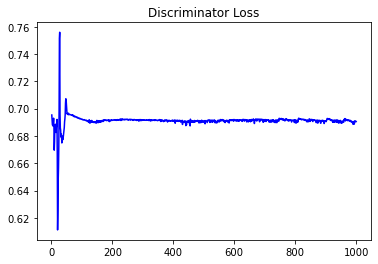

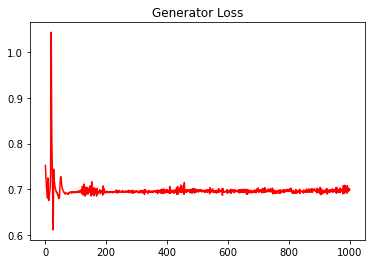

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.46649938278562475


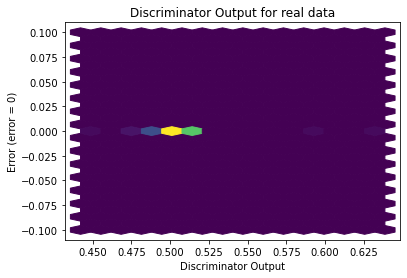

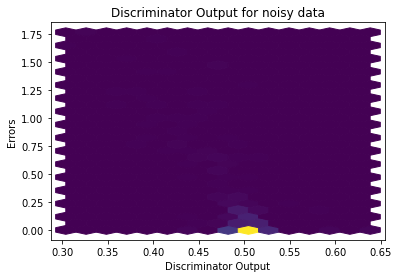

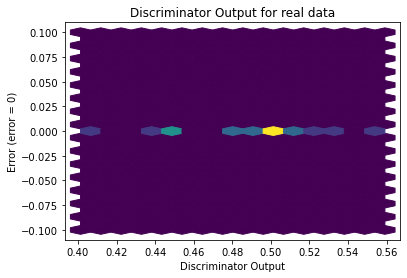

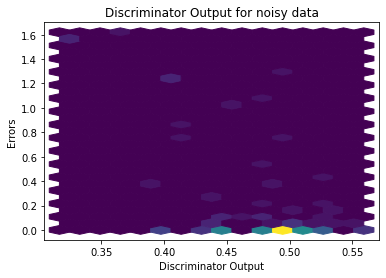

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


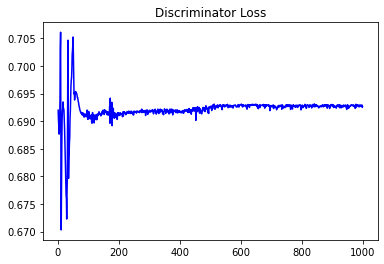

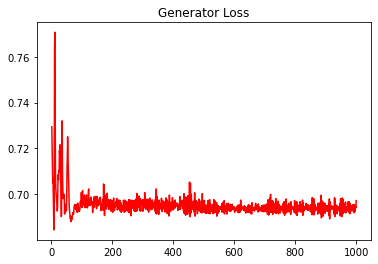

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3391381372170495


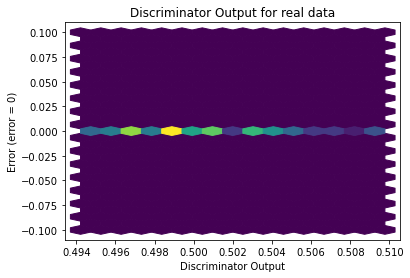

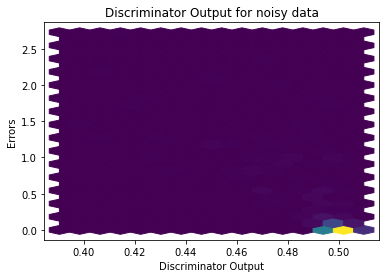

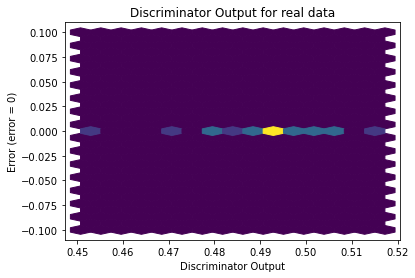

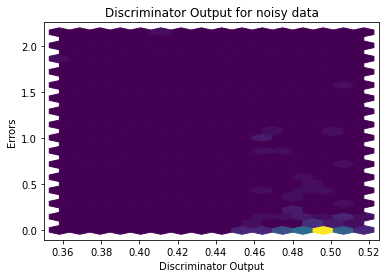

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6406]], requires_grad=True)
